In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

from model import Generator
from dataset import EmbedImagePairs
from train import train, test, synthesize

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
model = Generator(128).to(device)

trn_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/train_all', size=64, n_hidden=128), batch_size=300, shuffle=True, num_workers=4)
val_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/val', size=64, n_hidden=128, train=False), batch_size=100)
dataloader_dict = {'train': trn_dataloader, 'val': val_dataloader}

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [3]:
!rm -r "models/pytorch/128_all"
!mkdir -p "models/pytorch/128_all"

In [ ]:
# uncomment out if you want to compute validation metrics using dlib
# !pip install dlib

# !mkdir -p "models/dlib"

# !wget "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2" -O "models/dlib/facerec.dat.bz2"
# !wget "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2" -O "models/dlib/facelandmarks.dat.bz2"

# !bzip2 -d "models/dlib/facerec.dat.bz2"
# !bzip2 -d "models/dlib/facelandmarks.dat.bz2"

In [7]:
import dlib

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('models/dlib/facelandmarks.dat')
face_embedder = dlib.face_recognition_model_v1('models/dlib/facerec.dat')

dlib_models = [face_detector, landmark_detector, face_embedder]

In [5]:
num_epochs=150

train(model, dataloader_dict, criterion, optimizer, device, out_name='models/pytorch/128_all/model', 
      dlib_models=dlib_models, validate=True, validate_every=5, num_epochs=num_epochs)

  3%|▎         | 5/150 [00:52<25:59, 10.76s/it]

saving
Epoch:  5 Train Loss: 0.027352266832265233 Val Loss: 0.09100947588418437 Average Distance: 0.5540243708702038


  7%|▋         | 10/150 [01:46<25:27, 10.91s/it]

saving
Epoch:  10 Train Loss: 0.02378708648109963 Val Loss: 0.09047119959002048 Average Distance: 0.5200171023484959


 10%|█         | 15/150 [02:38<24:23, 10.84s/it]

saving
Epoch:  15 Train Loss: 0.02041522827108342 Val Loss: 0.10942036658525467 Average Distance: 0.5098205408824833


 13%|█▎        | 20/150 [03:31<23:23, 10.80s/it]

saving
Epoch:  20 Train Loss: 0.017006132741520033 Val Loss: 0.1028963049824259 Average Distance: 0.5073159724148321


 17%|█▋        | 25/150 [04:24<22:32, 10.82s/it]

saving
Epoch:  25 Train Loss: 0.014136959176793047 Val Loss: 0.0992434654483753 Average Distance: 0.5041544149886311


 20%|██        | 30/150 [05:17<21:44, 10.87s/it]

saving
Epoch:  30 Train Loss: 0.012074082700209349 Val Loss: 0.10634689626440538 Average Distance: 0.5082269264708428


 23%|██▎       | 35/150 [06:09<20:43, 10.81s/it]

saving
Epoch:  35 Train Loss: 0.010785648235105933 Val Loss: 0.11025693979674736 Average Distance: 0.5014262780278651


 27%|██▋       | 40/150 [07:02<19:49, 10.81s/it]

saving
Epoch:  40 Train Loss: 0.00910471716356874 Val Loss: 0.10123117314239519 Average Distance: 0.5025395519517746


 30%|███       | 45/150 [07:55<19:02, 10.88s/it]

saving
Epoch:  45 Train Loss: 0.008421013529547708 Val Loss: 0.10077329230519523 Average Distance: 0.5073486330644481


 33%|███▎      | 50/150 [08:48<18:03, 10.83s/it]

saving
Epoch:  50 Train Loss: 0.007564263471225349 Val Loss: 0.10595857035533517 Average Distance: 0.5011822689028524


 37%|███▋      | 55/150 [09:41<17:15, 10.90s/it]

saving
Epoch:  55 Train Loss: 0.0072916980515364115 Val Loss: 0.10577566677753904 Average Distance: 0.507020048693586


 40%|████      | 60/150 [10:34<16:09, 10.77s/it]

saving
Epoch:  60 Train Loss: 0.007005808286994009 Val Loss: 0.10269474666730492 Average Distance: 0.5028985150572468


 43%|████▎     | 65/150 [11:26<15:15, 10.77s/it]

saving
Epoch:  65 Train Loss: 0.00681951065864994 Val Loss: 0.10399787371928713 Average Distance: 0.5033547523211982


 47%|████▋     | 70/150 [12:20<14:32, 10.90s/it]

saving
Epoch:  70 Train Loss: 0.006247946310018895 Val Loss: 0.1095519434429903 Average Distance: 0.5060640643254813


 50%|█████     | 75/150 [13:12<13:29, 10.80s/it]

saving
Epoch:  75 Train Loss: 0.006184202582370167 Val Loss: 0.11044306894846723 Average Distance: 0.505750392092037


 53%|█████▎    | 80/150 [14:05<12:32, 10.75s/it]

saving
Epoch:  80 Train Loss: 0.005834875359382132 Val Loss: 0.10735366763794317 Average Distance: 0.5042561129189698


 57%|█████▋    | 85/150 [14:58<11:43, 10.83s/it]

saving
Epoch:  85 Train Loss: 0.005630565619054984 Val Loss: 0.11139754713636583 Average Distance: 0.506668882671663


 60%|██████    | 90/150 [15:51<10:51, 10.85s/it]

saving
Epoch:  90 Train Loss: 0.00569671379446112 Val Loss: 0.10300298852730641 Average Distance: 0.5038983751330647


 63%|██████▎   | 95/150 [16:43<09:54, 10.80s/it]

saving
Epoch:  95 Train Loss: 0.005702936062414402 Val Loss: 0.10360422895281715 Average Distance: 0.5114300573960058


 67%|██████▋   | 100/150 [17:36<09:04, 10.89s/it]

saving
Epoch:  100 Train Loss: 0.005332074780703399 Val Loss: 0.10255292170079408 Average Distance: 0.5066000822969491


 70%|███████   | 105/150 [18:30<08:10, 10.90s/it]

saving
Epoch:  105 Train Loss: 0.005248321239981072 Val Loss: 0.10235541228171999 Average Distance: 0.5071195964867015


 73%|███████▎  | 110/150 [19:22<07:12, 10.81s/it]

saving
Epoch:  110 Train Loss: 0.005046152879444371 Val Loss: 0.1043662135448076 Average Distance: 0.5003988584330814


 77%|███████▋  | 115/150 [20:15<06:19, 10.84s/it]

saving
Epoch:  115 Train Loss: 0.005060933469674041 Val Loss: 0.10600016786988857 Average Distance: 0.5055308767125206


 80%|████████  | 120/150 [21:08<05:26, 10.88s/it]

saving
Epoch:  120 Train Loss: 0.004858538754805054 Val Loss: 0.11691829905045771 Average Distance: 0.5094820576659101


 83%|████████▎ | 125/150 [22:01<04:30, 10.83s/it]

saving
Epoch:  125 Train Loss: 0.005361315059104355 Val Loss: 0.1024336710044768 Average Distance: 0.5111613199188888


 87%|████████▋ | 130/150 [22:54<03:35, 10.79s/it]

saving
Epoch:  130 Train Loss: 0.00489582519591765 Val Loss: 0.10603742050913582 Average Distance: 0.5045070322404622


 90%|█████████ | 135/150 [23:46<02:42, 10.80s/it]

saving
Epoch:  135 Train Loss: 0.0047484084661400935 Val Loss: 0.10598571822706578 Average Distance: 0.5075281009654897


 93%|█████████▎| 140/150 [24:40<01:49, 10.91s/it]

saving
Epoch:  140 Train Loss: 0.004833484889148235 Val Loss: 0.1117677252772635 Average Distance: 0.5127893914263422


 97%|█████████▋| 145/150 [25:33<00:54, 10.87s/it]

saving
Epoch:  145 Train Loss: 0.0045379559740349774 Val Loss: 0.10953384235633158 Average Distance: 0.5091083119715225


100%|██████████| 150/150 [26:26<00:00, 10.82s/it]

saving
Epoch:  150 Train Loss: 0.004543821445159527 Val Loss: 0.10439800523814902 Average Distance: 0.5124430576038655
saving


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

In [4]:
trn_losses = np.load('models/pytorch/128_all/modeltrn_losses.npy')
val_losses = np.load('models/pytorch/128_all/modelval_losses.npy')
avg_dists = np.load('models/pytorch/128_all/modelavg_dists.npy')

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'average distance (validation)'))

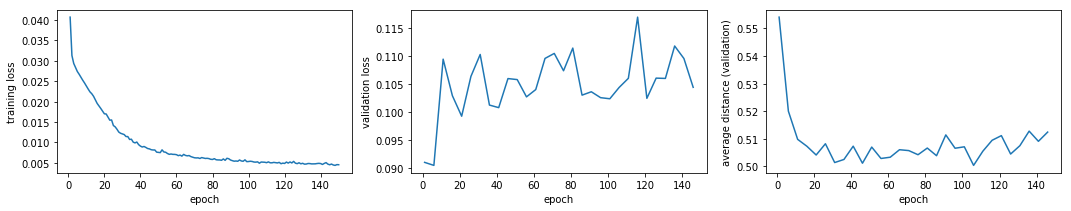

In [8]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18, 3)

sns.lineplot(x=range(1, num_epochs+1), y=trn_losses, ax=ax[0])
ax[0].set_xlabel('epoch'), ax[0].set_ylabel('training loss')

sns.lineplot(x=range(1, num_epochs+1, 5), y=val_losses, ax=ax[1])
ax[1].set_xlabel('epoch'), ax[1].set_ylabel('validation loss')

sns.lineplot(x=range(1, num_epochs+1, 5), y=avg_dists, markers=True, ax=ax[2])
ax[2].set_xlabel('epoch'), ax[2].set_ylabel('average distance (validation)')

In [5]:
best_epoch = (np.argmin(avg_dists) + 1) * 5
print("Best Epoch:", best_epoch, "Best average distance (val):", np.min(avg_dists))

data = torch.load(f"models/pytorch/128_all/model_{best_epoch}.pth")

model = Generator(128).to(device)
model.eval()

model.load_state_dict(data["model_state_dict"])

Best Epoch: 110 Best average distance (val): 0.5003988584330814


In [6]:
test_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/test', size=64, n_hidden=128, train=False), batch_size=100)

In [13]:
true_vecs, synth_vecs = test(model, test_dataloader, dlib_models, device, raw_dists=True)

In [14]:
# from https://stackoverflow.com/questions/26554211/numpy-shuffle-with-constraint

def random_derangement(n):
    while True:
        v = np.arange(n)
        for j in np.arange(n - 1, -1, -1):
            p = np.random.randint(0, j+1)
            if v[p] == j:
                break
            else:
                v[j], v[p] = v[p], v[j]
        else:
            if v[0] != 0:
                return v

In [26]:
none_locs = [vec[0] for vec in enumerate(synth_vecs) if vec[1] is None]
print("Face detector failed to recognize at locations:", len(none_locs))

Face detector failed to recognize at locations: 2


In [27]:
true_vecs = [vec[1] for vec in enumerate(true_vecs) if vec[0] not in none_locs]
synth_vecs = [vec[1] for vec in enumerate(synth_vecs) if vec[0] not in none_locs]

In [31]:
test_dists = []

for true, synth in zip(true_vecs, synth_vecs):
    dist = np.linalg.norm(true - synth)
    test_dists += [dist]
    
random_dists = []

synth_shuffled = np.array(synth_vecs)[random_derangement(len(synth_vecs))]

for true, synth in zip(true_vecs, synth_shuffled):
    dist = np.linalg.norm(true - synth)
    random_dists += [dist]

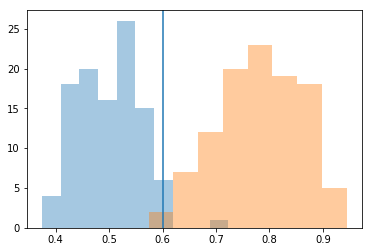

In [32]:
sns.distplot(test_dists, kde=False)
sns.distplot(random_dists, kde=False)
plt.axvline(x=0.6)
plt.show()

In [33]:
pct = percentileofscore(test_dists, 0.6)
mean = np.mean(test_dists)

print("Percent of synthesized images classified as same person at threshold 0.6:", pct, "Average distance (test):", mean)

Percent of synthesized images classified as same person at threshold 0.6: 97.16981132075472 Average distance (test): 0.5007800853316194


In [41]:
vis_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/vis', size=64, n_hidden=128, train=False), batch_size=8)

In [42]:
vis_images, names = synthesize(model, vis_dataloader, device)

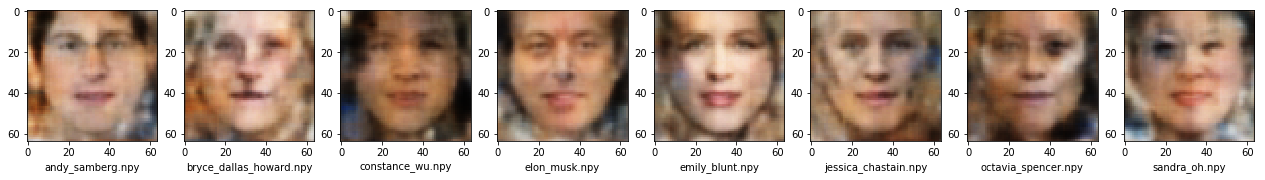

In [43]:
fig, ax = plt.subplots(1,len(vis_images))
fig.set_size_inches(22, 3)

for i in range(len(vis_images)):
    image, name = vis_images[i], names[i]
    ax[i].imshow(image)
    ax[i].set_xlabel(name.split("/")[-1])